Comparar metadados de duas imagens

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from PIL import Image

# Caminhos para as duas imagens
caminho_imagem1 =  'segment_mafic\dataset\test_data\test_masks\AT-Z-01-32_1x1_r.tif'
caminho_imagem2 =  '/segment_mafic/dataset/train_data/train_masks/AT-Z-01-33_1x1_r.tif'
# Abre as duas imagens usando a biblioteca PIL
imagem1 = Image.open(caminho_imagem1)
imagem2 = Image.open(caminho_imagem2)

# Compara os parâmetros das imagens
if imagem1.size == imagem2.size:
    print("As imagens têm o mesmo tamanho.")
else:
    print("As imagens têm tamanhos diferentes:", imagem1.size, imagem2.size)

if imagem1.mode == imagem2.mode:
    print("As imagens têm o mesmo modo de cor.")
else:
    print(f"As imagens têm modos de cor diferentes:\n Im1:", imagem1.mode, '\n Im2:', imagem2.mode)

if imagem1.format == imagem2.format:
    print("As imagens têm o mesmo formato.")
else:
    print("As imagens têm formatos diferentes:", imagem1.format, imagem2.format)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\segment_mafic\\dataset\test_data\test_masks\\AT-Z-01-32_1x1_r.tif'

In [6]:

# Obter os parâmetros da imagem
formato = imagem1.format
modo = imagem1.mode
largura, altura = imagem1.size
info = imagem1.info

# Exibir os parâmetros da imagem
print('Formato:', formato)
print('Modo:', modo)
print('Largura:', largura)
print('Altura:', altura)
print('Info:', info)
print('\n\n')

# Obter os parâmetros da imagem
formato = imagem2.format
modo = imagem2.mode
largura, altura = imagem2.size
info = imagem2.info
# Exibir os parâmetros da imagem
print('Formato:', formato)
print('Modo:', modo)
print('Largura:', largura)
print('Altura:', altura)
print('Info:', info)

Formato: TIFF
Modo: L
Largura: 679
Altura: 512
Info: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}



Formato: TIFF
Modo: L
Largura: 1362
Altura: 1024
Info: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}


Modificar os Metadados de uma imagem


In [ ]:
# Modifica os valores da imagem.info
import os
from PIL import Image

# Caminho da pasta com as imagens originais
pasta_imagens_originais = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Augmented_groundTruth/Treino/VIT_slices_images/'
# Caminho da pasta para salvar as novas imagens com os metadados corretos
pasta_imagens_novas =  pasta_imagens_originais

# Metadados corretos
nova_compressao = 'raw'
nova_resolucao = (1, 1)

# Função para alterar os metadados de uma imagem e salvar a nova imagem
def alterar_metadados(imagem_original, imagem_nova, nova_compressao, nova_resolucao):
    # Abre a imagem original usando o PIL
    img = Image.open(imagem_original)

    # Cria uma nova instância de imagem com as mesmas dimensões da imagem original
    nova_img = Image.new(img.mode, img.size)

    # Copia os dados da imagem original para a nova imagem
    nova_img.paste(img)

    # Atualiza os metadados da nova imagem
    nova_img.info['compression'] = nova_compressao
    nova_img.info['dpi'] = nova_resolucao
    nova_img.info['resolution'] = nova_resolucao

    # Salva a nova imagem com os metadados atualizados
    nova_img.save(imagem_nova)

# Percorre as imagens na pasta de origem
for nome_imagem in os.listdir(pasta_imagens_originais):
    caminho_imagem_original = os.path.join(pasta_imagens_originais, nome_imagem)
    caminho_imagem_nova = os.path.join(pasta_imagens_novas, nome_imagem)

    # Chama a função para criar a nova imagem com os metadados corretos
    alterar_metadados(caminho_imagem_original, caminho_imagem_nova, nova_compressao, nova_resolucao)


In [4]:
# Modificar o modo da imagem de I;16 para L
from PIL import Image
import os

# Caminho da pasta contendo as imagens
pasta_imagens =  '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Ground_truth/Dados_teste/masks_corrigidas/'

# Percorre as imagens na pasta
for nome_imagem in os.listdir(pasta_imagens):
    caminho_imagem_original = os.path.join(pasta_imagens, nome_imagem)
    caminho_nova_imagem = caminho_imagem_original

    # Abre a imagem original no modo 'I;16'
    imagem_original = Image.open(caminho_imagem_original)

    # Converte a imagem para o modo 'L'
    nova_imagem = imagem_original.convert('L')

    # Salva a nova imagem no mesmo caminho com o mesmo nome
    nova_imagem.save(caminho_nova_imagem)


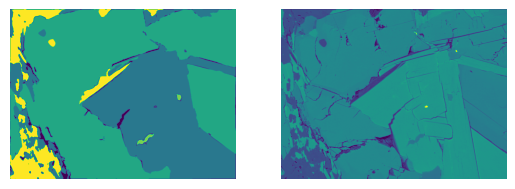

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Carrega as duas imagens
imagem1 = Image.open(caminho_imagem1)
imagem2 = Image.open(caminho_imagem2)

# Cria uma figura com duas subplots lado a lado
fig, axes = plt.subplots(1, 2)

# Plota a imagem 1 na primeira subplot
axes[0].imshow(imagem1)
axes[0].axis('off')

# Plota a imagem 2 na segunda subplot
axes[1].imshow(imagem2)
axes[1].axis('off')

# Exibe a figura
plt.show()


Vizualizar aleatoriamente imagens e suas respectivas máscaras


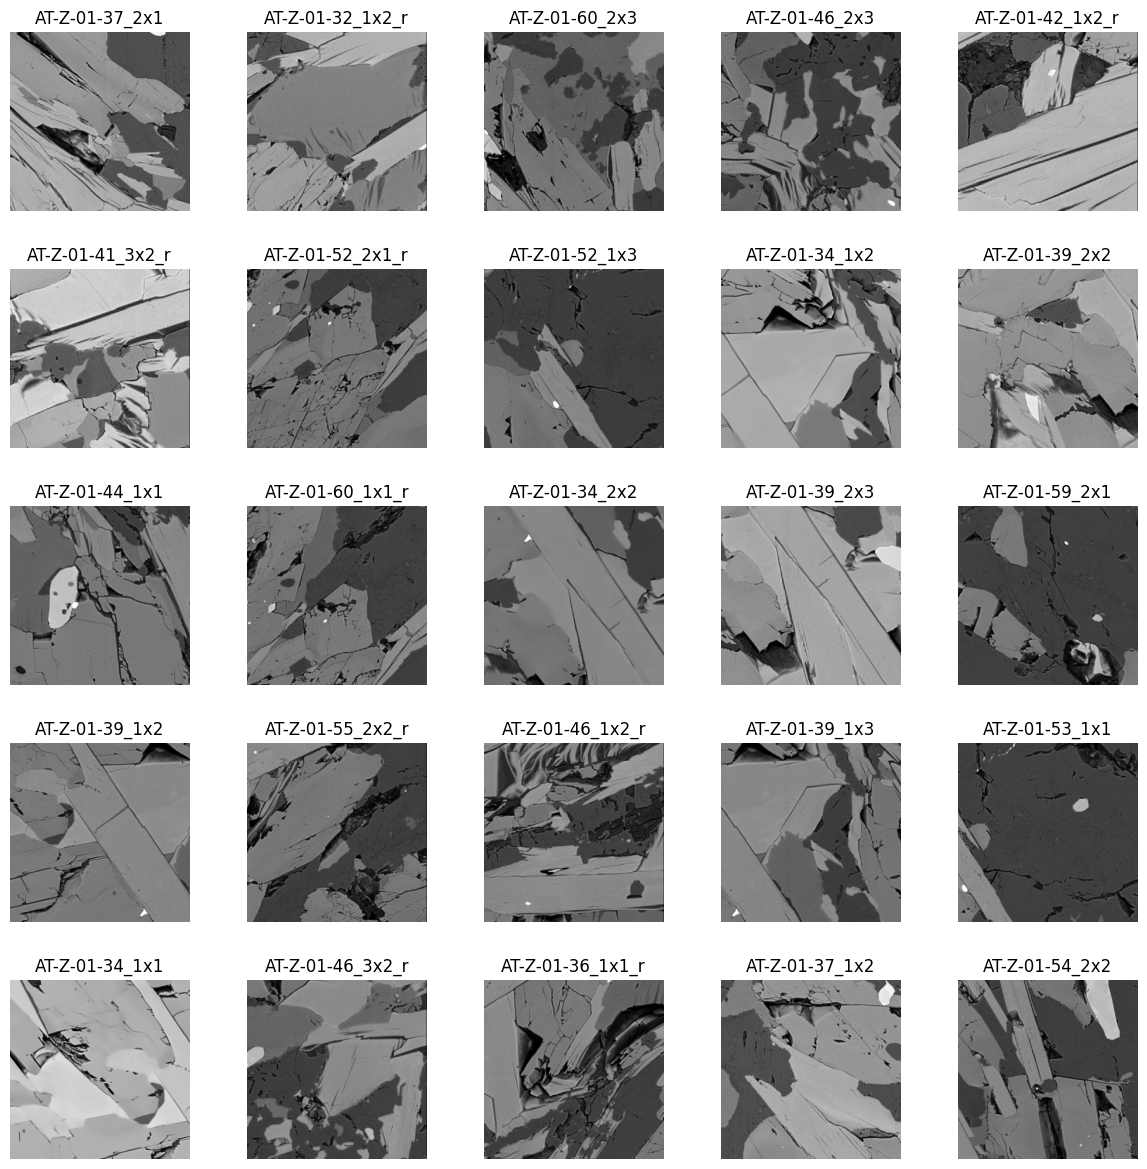

In [ ]:
from matplotlib import cm
import os
import random
import matplotlib.pyplot as plt

# Caminho para a pasta que contém as imagens
caminho_pasta = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Augmented_groundTruth/VIT_slices_images/'

# Lista para armazenar os nomes das imagens
nomes_imagens = []

# Lista para armazenar os caminhos completos das imagens
caminhos_imagens = []

# Percorre os arquivos da pasta e adiciona os nomes e caminhos das imagens às listas
for arquivo in os.listdir(caminho_pasta):
    if arquivo.endswith('.tif'):
        nome_imagem = os.path.splitext(arquivo)[0]
        nomes_imagens.append(nome_imagem)
        caminho_imagem = os.path.join(caminho_pasta, arquivo)
        caminhos_imagens.append(caminho_imagem)

# Seleciona 25 imagens aleatórias
imagens_aleatorias = random.sample(caminhos_imagens, 25)

# Configuração do quadro 5x5 para exibir as imagens
fig, axs = plt.subplots(5, 5, figsize=(12, 12))
fig.tight_layout()

nomes_globais = []
# Percorre as imagens selecionadas e as exibe no quadro
for i, imagem in enumerate(imagens_aleatorias):
    # Carrega a imagem
    img = plt.imread(imagem, format='tif')

    # Obtém o nome da imagem correspondente
    nome_imagem = nomes_imagens[caminhos_imagens.index(imagem)]

    # Exibe a imagem no quadro com seu nome como título
    axs[i // 5, i % 5].imshow(img, cmap='gray')
    axs[i // 5, i % 5].set_title(nome_imagem)
    axs[i // 5, i % 5].axis('off')
    nomes_globais.append(nome_imagem)
# Exibe o quadro com as imagens
plt.show()

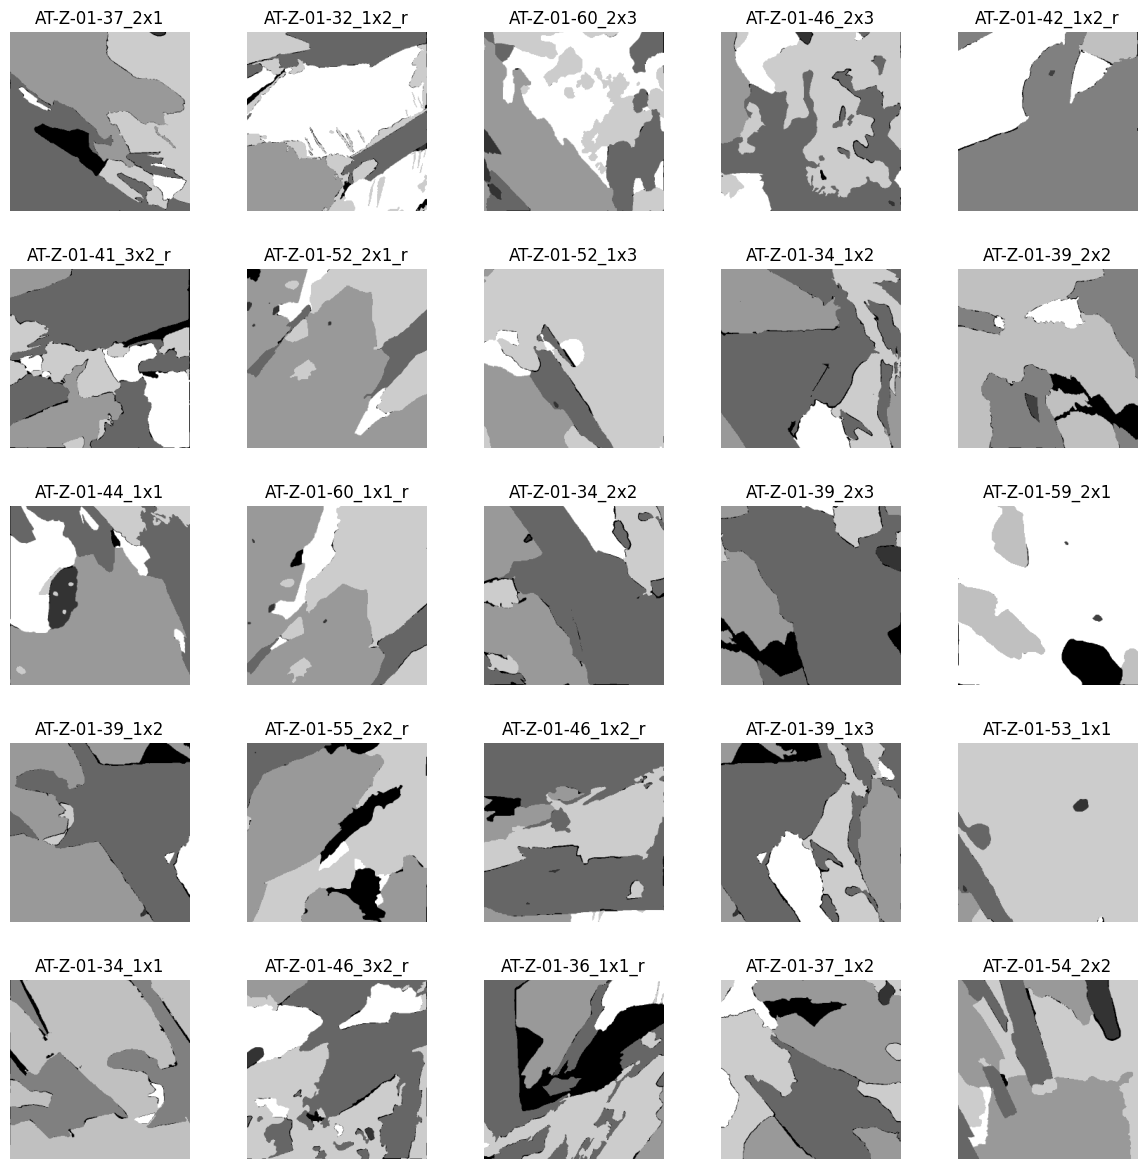

In [ ]:
from PIL import Image

# Caminho para a pasta que contém as imagens TIFF
caminho_pasta = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Augmented_groundTruth/VIT_slices_masks2/'

# Configuração do quadro 5x5 para exibir as imagens
fig, axs = plt.subplots(5, 5, figsize=(12, 12))
fig.tight_layout()

# Percorre os nomes das imagens e exibe cada uma delas no quadro
for i, nome_imagem in enumerate(nomes_globais):
    # Obtém o caminho completo da imagem com base no nome
    caminho_imagem = os.path.join(caminho_pasta, f'{nome_imagem}.tif')

    # Abre a imagem usando a biblioteca PIL
    img = Image.open(caminho_imagem)

    # Exibe a imagem no quadro com seu nome como título
    axs[i // 5, i % 5].imshow(img, cmap='gray')
    axs[i // 5, i % 5].set_title(nome_imagem)
    axs[i // 5, i % 5].axis('off')

# Exibe o quadro com as imagens
plt.show()


Adicionar as mascaras Vit ao global

In [ ]:
import shutil
import os

# Caminho da pasta de origem das imagens
pasta_origem = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Augmented_groundTruth/VIT_slices_masks2/'

# Caminho da pasta de destino para as imagens
pasta_destino = '/content/drive/MyDrive/MEV - metamaficas/Projeto_Segmentação_Rocha_Máfica/Augmented_groundTruth/all_mask_slices/'

# Percorre as imagens na pasta de origem
for nome_imagem in os.listdir(pasta_origem):
    # Caminho completo da imagem de origem
    caminho_imagem_origem = os.path.join(pasta_origem, nome_imagem)

    # Caminho completo para a imagem de destino
    caminho_imagem_destino = os.path.join(pasta_destino, nome_imagem)

    # Move a imagem de origem para a pasta de destino (substituindo a imagem existente, se houver)
    shutil.move(caminho_imagem_origem, caminho_imagem_destino)
